In [28]:
import pandas as pd
from sqlalchemy import create_engine

In [29]:
circuits_file = "../resources/data/circuits.csv"
circuits_df = pd.read_csv(circuits_file)
circuits_df.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [30]:
circuits_df = circuits_df.rename(columns= {'circuitId': 'circuitid'})
circuits_df

,circuitid,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,73,BAK,Baku City Circuit,Baku,Azerbaijan,40.37250,49.85330,-7,http://en.wikipedia.org/wiki/Baku_City_Circuit
73,74,hanoi,Hanoi Street Circuit,Hanoi,Vietnam,21.01660,105.76600,9,http://en.wikipedia.org/wiki/Hanoi_Street_Circuit
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
75,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit


In [31]:
circuits_df = circuits_df.set_index('circuitid')
circuits_df


,circuitRef,name,location,country,lat,lng,alt,url
circuitid,,,,,,,,
1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...
73,BAK,Baku City Circuit,Baku,Azerbaijan,40.37250,49.85330,-7,http://en.wikipedia.org/wiki/Baku_City_Circuit
74,hanoi,Hanoi Street Circuit,Hanoi,Vietnam,21.01660,105.76600,9,http://en.wikipedia.org/wiki/Hanoi_Street_Circuit
75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...


In [32]:
circuit_cols = ['name', 'location', 'country', 'lat', 'lng', 'url']
circuit_transformed = circuits_df[circuit_cols].copy()
circuit_transformed

,name,location,country,lat,lng,url
circuitid,,,,,,
1,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,http://en.wikipedia.org/wiki/Sepang_Internatio...
3,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,http://en.wikipedia.org/wiki/Bahrain_Internati...
4,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
5,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...
73,Baku City Circuit,Baku,Azerbaijan,40.37250,49.85330,http://en.wikipedia.org/wiki/Baku_City_Circuit
74,Hanoi Street Circuit,Hanoi,Vietnam,21.01660,105.76600,http://en.wikipedia.org/wiki/Hanoi_Street_Circuit
75,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,http://en.wikipedia.org/wiki/Algarve_Internati...


In [33]:
race_file = "../resources/data/races.csv"
race_df = pd.read_csv(race_file)
race_df.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [34]:
race_df = race_df.rename(columns= {'raceId': 'raceid', 'circuitId': 'circuitid'})
race_df

,raceid,year,round,circuitid,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...,...
1052,1069,2021,17,69,United States Grand Prix,2021-10-24,19:00:00,http://en.wikipedia.org/wiki/2021_United_State...
1053,1070,2021,18,32,Mexico City Grand Prix,2021-11-07,19:00:00,http://en.wikipedia.org/wiki/2021_Mexican_Gran...
1054,1071,2021,19,18,Brazilian Grand Prix,2021-11-14,17:00:00,http://en.wikipedia.org/wiki/2021_Brazilian_Gr...
1055,1072,2021,21,77,Saudi Arabian Grand Prix,2021-12-05,17:30:00,http://en.wikipedia.org/wiki/2021_Saudi_Arabia...


In [35]:
race_df = race_df.set_index('raceid')
race_df.head()

,year,round,circuitid,name,date,time,url
raceid,,,,,,,
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [36]:
race_cols = ['year', 'circuitid', 'name', 'url']
race_transformed = race_df[race_cols].copy()
race_transformed
# race_transformed = race_transformed.set_index('raceId', inplace=True)
# race_transformed.head()

,year,circuitid,name,url
raceid,,,,
1,2009,1,Australian Grand Prix,http://en.wikipedia.org/wiki/2009_Australian_G...
2,2009,2,Malaysian Grand Prix,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
3,2009,17,Chinese Grand Prix,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
4,2009,3,Bahrain Grand Prix,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
5,2009,4,Spanish Grand Prix,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...
1069,2021,69,United States Grand Prix,http://en.wikipedia.org/wiki/2021_United_State...
1070,2021,32,Mexico City Grand Prix,http://en.wikipedia.org/wiki/2021_Mexican_Gran...
1071,2021,18,Brazilian Grand Prix,http://en.wikipedia.org/wiki/2021_Brazilian_Gr...


In [48]:
race_group = race_transformed.groupby('name').count()
race_group = race_group.sort_values(by= 'year', ascending=False)
race_group

,year,circuitid,url
name,,,
Italian Grand Prix,72,72,72
British Grand Prix,72,72,72
Monaco Grand Prix,67,67,67
Belgian Grand Prix,66,66,66
German Grand Prix,64,64,64
French Grand Prix,61,61,61
Spanish Grand Prix,51,51,51
Canadian Grand Prix,50,50,50
Brazilian Grand Prix,48,48,48


<AxesSubplot:title={'center':'Amount of Races per Circuit'}, xlabel='Circuits', ylabel='Amount of years in F1'>

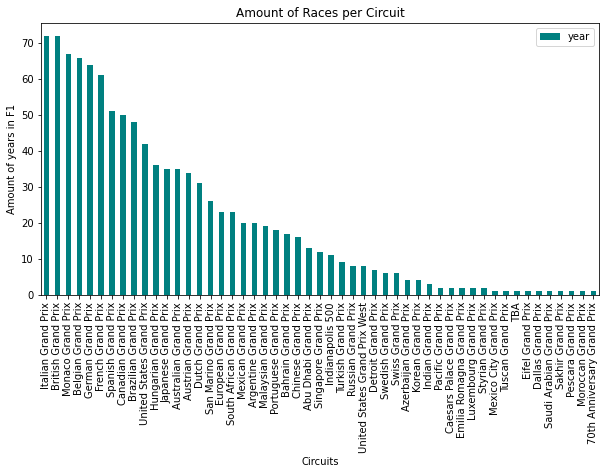

In [63]:
race_chart = race_group.plot.bar(y='year', color= 'teal', figsize= (10,5), title = "Amount of Races per Circuit", xlabel= "Circuits", ylabel= 'Amount of years in F1')
race_chart

In [37]:
connection_string = "postgres:Allstar123@localhost:5433/F1_Fun"
engine = create_engine(f'postgresql://{connection_string}')

In [41]:
circuit_transformed.to_sql(name='circuits_db', con=engine, if_exists='append', index=True)

In [42]:
race_transformed.to_sql(name='race_db', con=engine, if_exists='append', index=True)